In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('data_pivotedTE.csv')

In [4]:
data.head(14)

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,2006,14605.333333,4571.000000,14938.000000,NaN,NaN,16534.833333,10414.666667,3720.500000,3387.666667,24891.666667,24502.500000,7291.000000,9236.833333,10376.333333
1,2007,16533.666667,5513.666667,15759.333333,NaN,NaN,17085.833333,10612.666667,5527.666667,4032.000000,25715.333333,25422.000000,7619.000000,10068.666667,10969.000000
2,2008,17155.000000,6056.000000,16646.666667,12163.000000,18538.200000,15732.166667,10258.333333,6257.666667,4461.666667,26599.166667,26395.000000,7556.833333,10923.000000,12531.333333
3,2009,17410.666667,5320.166667,16320.000000,17612.000000,23039.000000,14719.833333,10631.833333,4726.333333,3640.500000,26398.333333,26759.000000,7651.000000,10345.000000,12149.666667
4,2010,17003.000000,5173.333333,16738.666667,18015.000000,23672.500000,14852.833333,10663.666667,4232.666667,3109.000000,26375.333333,21860.000000,7775.166667,10398.000000,11533.666667
5,2011,17492.666667,5726.166667,17486.000000,15029.200000,19787.000000,14617.166667,10644.000000,4646.500000,3699.166667,26891.500000,18933.333333,7509.166667,10238.500000,11222.666667
6,2012,18017.333333,6310.333333,18152.333333,12881.666667,17544.000000,15364.833333,10711.666667,4902.166667,3924.666667,26961.833333,21087.500000,6901.833333,10036.000000,10400.333333
7,2013,18943.000000,7096.166667,18392.000000,12930.000000,17725.666667,15708.833333,10595.666667,5466.666667,4247.333333,27917.333333,19050.000000,7230.000000,9930.000000,10125.666667
8,2014,18879.333333,8020.333333,18556.666667,13116.666667,18202.666667,16899.666667,10887.000000,6126.333333,4638.333333,28642.000000,19400.000000,7371.666667,10534.666667,10310.000000
9,2015,19133.000000,8373.333333,18762.000000,13206.666667,18791.333333,17831.000000,11017.333333,6716.333333,4991.000000,26669.000000,19866.666667,7913.000000,10516.666667,10631.000000


In [5]:
data_noyear = data.drop('Year', axis=1)

In [6]:
data_noyear.head(14)

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,14605.333333,4571.000000,14938.000000,NaN,NaN,16534.833333,10414.666667,3720.500000,3387.666667,24891.666667,24502.500000,7291.000000,9236.833333,10376.333333
1,16533.666667,5513.666667,15759.333333,NaN,NaN,17085.833333,10612.666667,5527.666667,4032.000000,25715.333333,25422.000000,7619.000000,10068.666667,10969.000000
2,17155.000000,6056.000000,16646.666667,12163.000000,18538.200000,15732.166667,10258.333333,6257.666667,4461.666667,26599.166667,26395.000000,7556.833333,10923.000000,12531.333333
3,17410.666667,5320.166667,16320.000000,17612.000000,23039.000000,14719.833333,10631.833333,4726.333333,3640.500000,26398.333333,26759.000000,7651.000000,10345.000000,12149.666667
4,17003.000000,5173.333333,16738.666667,18015.000000,23672.500000,14852.833333,10663.666667,4232.666667,3109.000000,26375.333333,21860.000000,7775.166667,10398.000000,11533.666667
5,17492.666667,5726.166667,17486.000000,15029.200000,19787.000000,14617.166667,10644.000000,4646.500000,3699.166667,26891.500000,18933.333333,7509.166667,10238.500000,11222.666667
6,18017.333333,6310.333333,18152.333333,12881.666667,17544.000000,15364.833333,10711.666667,4902.166667,3924.666667,26961.833333,21087.500000,6901.833333,10036.000000,10400.333333
7,18943.000000,7096.166667,18392.000000,12930.000000,17725.666667,15708.833333,10595.666667,5466.666667,4247.333333,27917.333333,19050.000000,7230.000000,9930.000000,10125.666667
8,18879.333333,8020.333333,18556.666667,13116.666667,18202.666667,16899.666667,10887.000000,6126.333333,4638.333333,28642.000000,19400.000000,7371.666667,10534.666667,10310.000000
9,19133.000000,8373.333333,18762.000000,13206.666667,18791.333333,17831.000000,11017.333333,6716.333333,4991.000000,26669.000000,19866.666667,7913.000000,10516.666667,10631.000000


In [7]:
data_backforwardfilled=data_noyear.bfill()
data_backforwardfilled

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,14605.333333,4571.000000,14938.000000,12163.000000,18538.200000,16534.833333,10414.666667,3720.500000,3387.666667,24891.666667,24502.500000,7291.000000,9236.833333,10376.333333
1,16533.666667,5513.666667,15759.333333,12163.000000,18538.200000,17085.833333,10612.666667,5527.666667,4032.000000,25715.333333,25422.000000,7619.000000,10068.666667,10969.000000
2,17155.000000,6056.000000,16646.666667,12163.000000,18538.200000,15732.166667,10258.333333,6257.666667,4461.666667,26599.166667,26395.000000,7556.833333,10923.000000,12531.333333
3,17410.666667,5320.166667,16320.000000,17612.000000,23039.000000,14719.833333,10631.833333,4726.333333,3640.500000,26398.333333,26759.000000,7651.000000,10345.000000,12149.666667
4,17003.000000,5173.333333,16738.666667,18015.000000,23672.500000,14852.833333,10663.666667,4232.666667,3109.000000,26375.333333,21860.000000,7775.166667,10398.000000,11533.666667
5,17492.666667,5726.166667,17486.000000,15029.200000,19787.000000,14617.166667,10644.000000,4646.500000,3699.166667,26891.500000,18933.333333,7509.166667,10238.500000,11222.666667
6,18017.333333,6310.333333,18152.333333,12881.666667,17544.000000,15364.833333,10711.666667,4902.166667,3924.666667,26961.833333,21087.500000,6901.833333,10036.000000,10400.333333
7,18943.000000,7096.166667,18392.000000,12930.000000,17725.666667,15708.833333,10595.666667,5466.666667,4247.333333,27917.333333,19050.000000,7230.000000,9930.000000,10125.666667
8,18879.333333,8020.333333,18556.666667,13116.666667,18202.666667,16899.666667,10887.000000,6126.333333,4638.333333,28642.000000,19400.000000,7371.666667,10534.666667,10310.000000
9,19133.000000,8373.333333,18762.000000,13206.666667,18791.333333,17831.000000,11017.333333,6716.333333,4991.000000,26669.000000,19866.666667,7913.000000,10516.666667,10631.000000


In [8]:
data_interpolate=data_noyear.interpolate()
data_interpolate

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,14605.333333,4571.000000,14938.000000,NaN,NaN,16534.833333,10414.666667,3720.500000,3387.666667,24891.666667,24502.500000,7291.000000,9236.833333,10376.333333
1,16533.666667,5513.666667,15759.333333,NaN,NaN,17085.833333,10612.666667,5527.666667,4032.000000,25715.333333,25422.000000,7619.000000,10068.666667,10969.000000
2,17155.000000,6056.000000,16646.666667,12163.000000,18538.200000,15732.166667,10258.333333,6257.666667,4461.666667,26599.166667,26395.000000,7556.833333,10923.000000,12531.333333
3,17410.666667,5320.166667,16320.000000,17612.000000,23039.000000,14719.833333,10631.833333,4726.333333,3640.500000,26398.333333,26759.000000,7651.000000,10345.000000,12149.666667
4,17003.000000,5173.333333,16738.666667,18015.000000,23672.500000,14852.833333,10663.666667,4232.666667,3109.000000,26375.333333,21860.000000,7775.166667,10398.000000,11533.666667
5,17492.666667,5726.166667,17486.000000,15029.200000,19787.000000,14617.166667,10644.000000,4646.500000,3699.166667,26891.500000,18933.333333,7509.166667,10238.500000,11222.666667
6,18017.333333,6310.333333,18152.333333,12881.666667,17544.000000,15364.833333,10711.666667,4902.166667,3924.666667,26961.833333,21087.500000,6901.833333,10036.000000,10400.333333
7,18943.000000,7096.166667,18392.000000,12930.000000,17725.666667,15708.833333,10595.666667,5466.666667,4247.333333,27917.333333,19050.000000,7230.000000,9930.000000,10125.666667
8,18879.333333,8020.333333,18556.666667,13116.666667,18202.666667,16899.666667,10887.000000,6126.333333,4638.333333,28642.000000,19400.000000,7371.666667,10534.666667,10310.000000
9,19133.000000,8373.333333,18762.000000,13206.666667,18791.333333,17831.000000,11017.333333,6716.333333,4991.000000,26669.000000,19866.666667,7913.000000,10516.666667,10631.000000


In [9]:
data_noyear.describe()

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
count,14.000000,14.000000,15.000000,12.000000,12.000000,13.000000,13.000000,15.000000,14.000000,14.000000,15.000000,13.000000,14.000000,14.000000
mean,18467.357143,7277.297619,18075.488889,14291.461111,20009.030556,16945.846154,10839.628205,6305.788889,4830.857143,27817.226190,22142.844444,7874.435897,10763.238095,11315.142857
std,1952.435680,2083.242176,1730.547468,1851.288075,2095.615184,2226.494459,428.725459,1837.708739,1629.967854,2469.648927,2629.485526,860.789349,1067.241229,922.241423
min,14605.333333,4571.000000,14938.000000,12163.000000,17544.000000,14617.166667,10258.333333,3720.500000,3109.000000,24891.666667,18933.333333,6901.833333,9236.833333,10125.666667
25%,17218.916667,5566.791667,16692.666667,13070.000000,18454.316667,15364.833333,10612.666667,4814.250000,3755.541667,26448.541667,20050.000000,7371.666667,10111.125000,10458.000000
50%,18448.333333,6703.250000,18392.000000,13608.333333,19494.833333,16534.833333,10663.666667,6126.333333,4354.500000,26926.666667,21666.666667,7619.000000,10457.333333,11216.166667
75%,19963.000000,8649.083333,19101.166667,14907.300000,21398.583333,17831.000000,11017.333333,7439.500000,5413.000000,28217.833333,23967.916667,7913.000000,11022.250000,11996.583333
max,21773.333333,11163.666667,20649.666667,18015.000000,23672.500000,21504.666667,11771.666667,9751.000000,9248.666667,33382.000000,26759.000000,10087.000000,13286.333333,13136.333333


EURO_COUNTRIES = ['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia','Lithuania','Luxembourg', 'Netherlands', 'Portugal','Slovenia','Spain']

In [10]:
data_backfilled_missingdropped=data_backforwardfilled.dropna()

In [11]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.71
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.43
Stationary


In [12]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Estonia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 0.12
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.97
Stationary


In [13]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Finland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.40
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 0.91
Stationary


In [14]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['France'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.15
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.22
Stationary


In [15]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Germany'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -5.46
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 0.00
Non-Stationary


In [16]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Ireland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.16
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 0.94
Stationary


In [17]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Italy'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 12.03
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 1.00
Stationary


In [18]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Spain'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.65
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.86
Stationary


In [19]:
len(data_backfilled_missingdropped['Spain'])
#14 countries, 13 rows, 182 variables

13

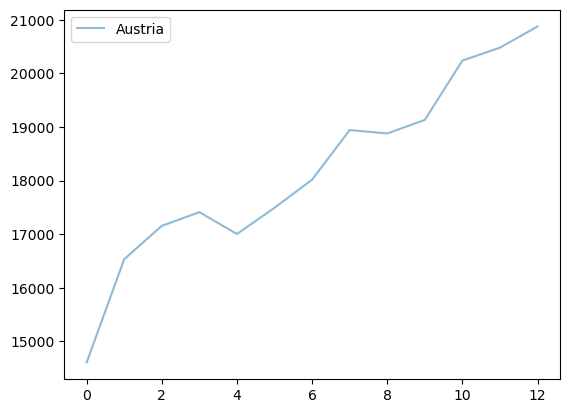

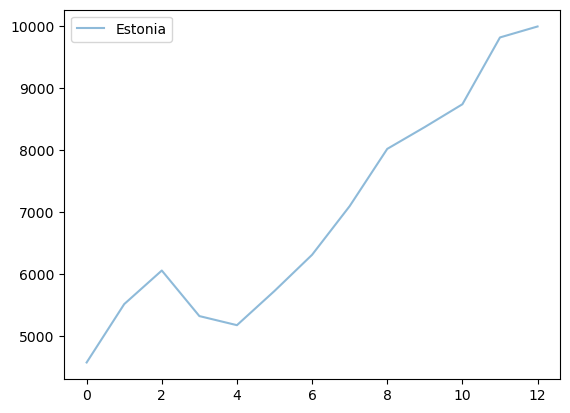

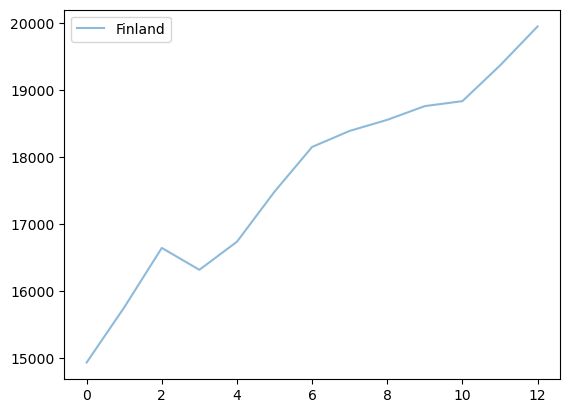

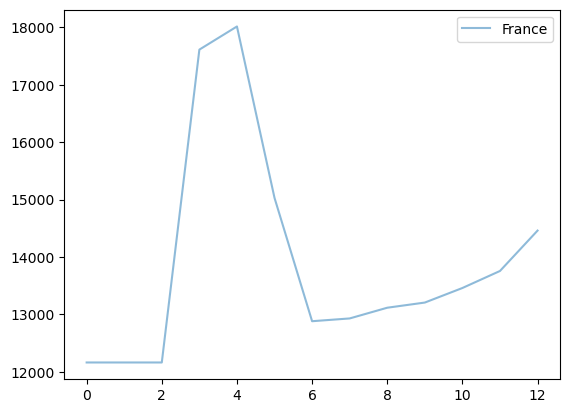

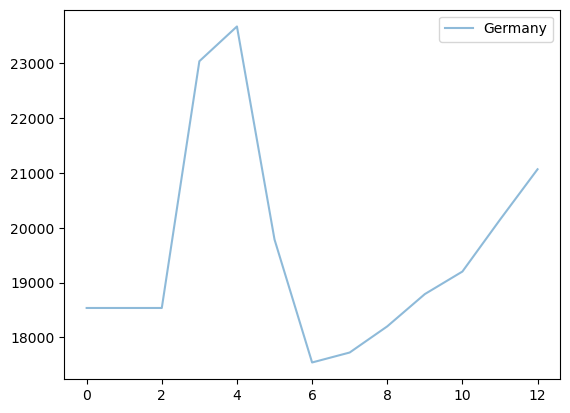

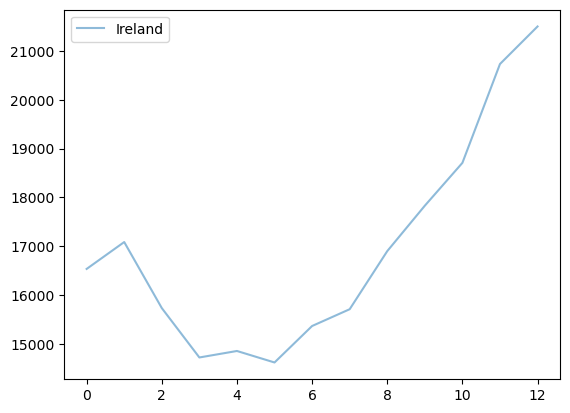

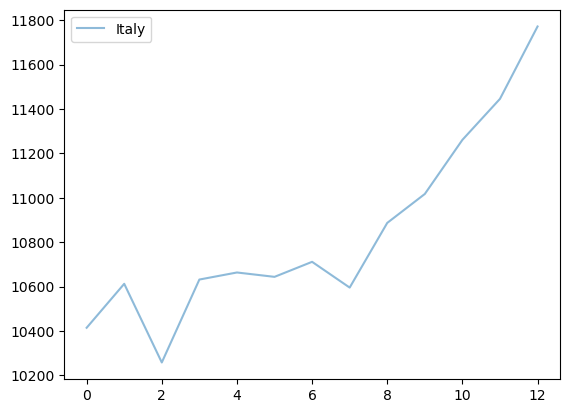

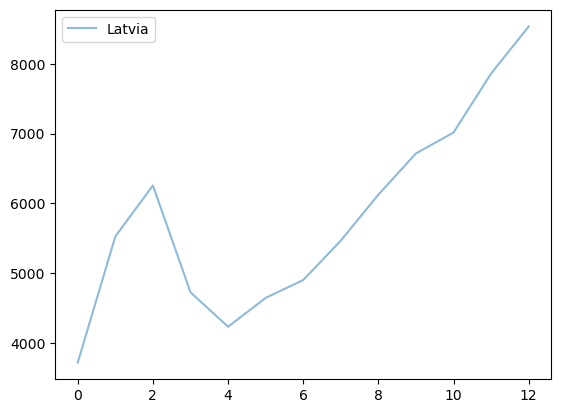

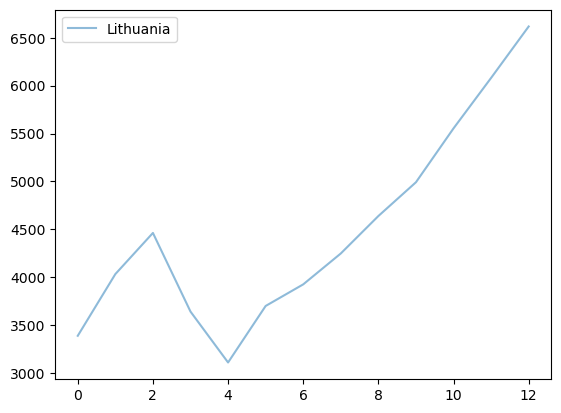

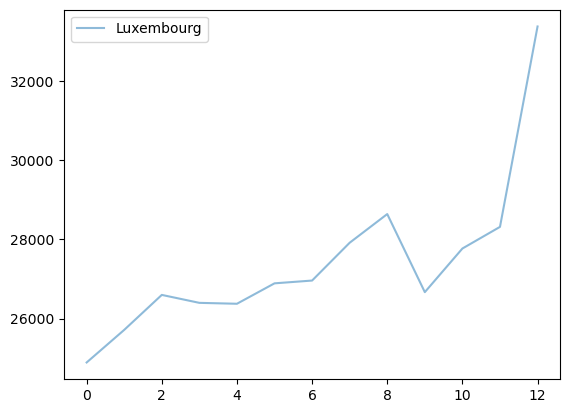

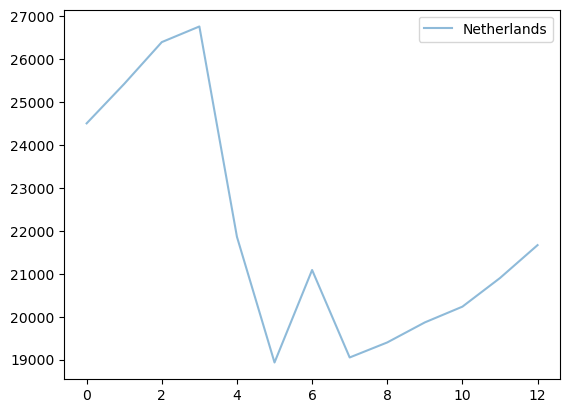

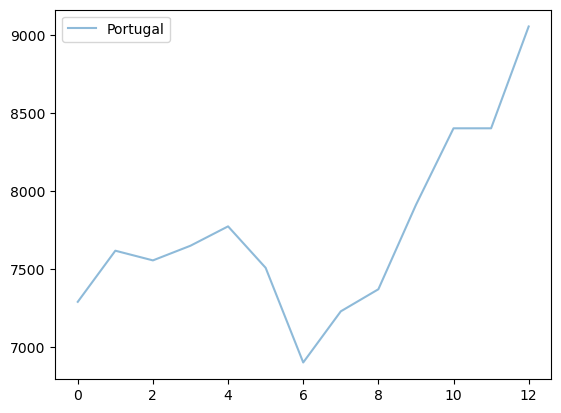

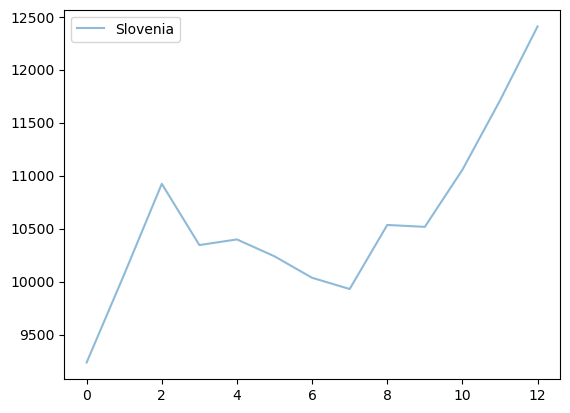

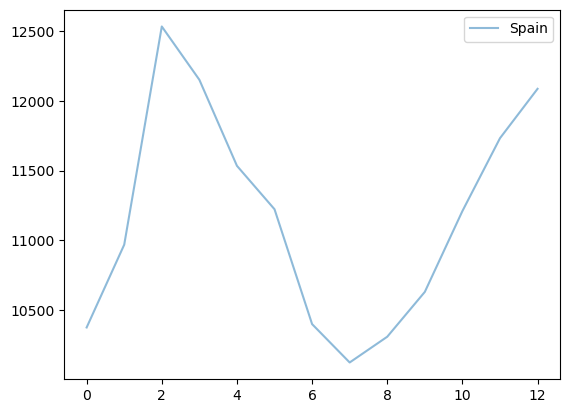

In [20]:
data_backfilled_missingdropped[['Austria']].plot(alpha=0.5);
data_backfilled_missingdropped[['Estonia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Finland']].plot(alpha=0.5);
data_backfilled_missingdropped[['France']].plot(alpha=0.5);
data_backfilled_missingdropped[['Germany']].plot(alpha=0.5);
data_backfilled_missingdropped[['Ireland']].plot(alpha=0.5);
data_backfilled_missingdropped[['Italy']].plot(alpha=0.5);
data_backfilled_missingdropped[['Latvia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Lithuania']].plot(alpha=0.5);
data_backfilled_missingdropped[['Luxembourg']].plot(alpha=0.5);
data_backfilled_missingdropped[['Netherlands']].plot(alpha=0.5);
data_backfilled_missingdropped[['Portugal']].plot(alpha=0.5);
data_backfilled_missingdropped[['Slovenia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Spain']].plot(alpha=0.5);